<div class="alert alert-block alert-info">
    <b>Project</b></div>

The goal of this project is to make a montly predictions of the Ethereum cryptocurrency price for educational purposes only. It's important to note that cryptocurrency price prediction is challenging due to the extreme volatility of these assets. 

**What is Ethereum?**

Ethereum is a decentralized blockchain platform and cryptocurrency introduced in 2015. It's known for its innovation with smart contracts, self-executing agreements written in code. Ethereum's native cryptocurrency is Ether (ETH), used for transactions and running smart contracts. It's a foundation for decentralized applications (DApps) across various industries and introduced the concept of Decentralized Autonomous Organizations (DAOs). Ethereum has undergone upgrades, like Ethereum 2.0, to improve scalability and efficiency. It remains a central player in the evolving blockchain and cryptocurrency space.

**Consideration:**

The dataset used in this model covers the period from 2017 to 2023. While significant changes in the data are observed from 2019 onwards, it's important to note that we have chosen not to exclude any data from the full time period for this project. We have opted to retain the entire time period in our analysis, despite the potential for poorer predictive results, to ensure a comprehensive understanding of the dataset's dynamics.

<div class="alert alert-block alert-info">
    <b>Models</b></div>

**ARIMA Model:** 

The Autoregressive Integrated Moving Average (ARIMA)model is a powerful time series forecasting method known for its adaptability and accuracy. Key points about the ARIMA model include:

- Model Components: ARIMA combines three components - Autoregressive (AR), Integrated (I), and Moving Average (MA) - to capture complex time series patterns.

- AR Component: It accounts for the relationship between the current value and past values. The order of autoregression is denoted by 'p.'

- I Component: Differencing is used to achieve stationarity in the data. The order of differencing is denoted by 'd.'

- MA Component: It considers the dependency between the current value and past white noise errors. The order of the moving average is denoted by 'q.'

- Strengths: ARIMA is adaptable, doesn't assume data distribution, provides accurate forecasts, and doesn't require data transformation.

- Typically requires only one numeric column, which contains the univariate time series data we want to forecast. This single column should consist of numerical values representing the observations or measurements taken at different time points.

**Prophet Model:**

Prophet is a forecasting model developed by Facebook for handling time series data. It uses an additive model approach, fitting non-linear trends by considering yearly, weekly, and daily seasonality, along with holiday effects.

One of the strengths of Prophet is its robustness in handling missing data, shifts in trends, and outliers. Notably, Prophet is designed specifically for time series data, which makes it unnecessary to perform normalization or standardization on the input data.

To work effectively with the Prophet library, you need to provide a dataframe with specific column names and formats. Here's what you need to ensure:

- The time column, denoted as "ds," should follow a format that Pandas can recognize. Ideally, it should be in YYYY-MM-DD format for dates or YYYY-MM-DD HH:MM:SS format for timestamps.

- The metric column, denoted as "y," must contain numeric values and represents the measurement you aim to forecast.

<div class="alert alert-block alert-info">
    <b>Libraries</b></div>

In [170]:
# Essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import numpy as dragon
import math

# Libraries for statistical modeling and machine learning
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterSampler
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import kpss

# Libraries for time series analysis and forecasting
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


# Libraries for data visualization and plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from plotly.subplots import make_subplots
from prophet.plot import plot_plotly, plot_components_plotly

# Libraries for handling dates and times
from datetime import datetime, timedelta

# Other utilities and tools
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (15,7)
import random

# For visualizing and analyzing missing data in datasets
import missingno as msno


<div class="alert alert-block alert-info">
    <b>Loading Data</b></div>

In [2]:
# Ethereum df
# ------------

# Using the today function data will be updated everytime the function is runned 
end_date = datetime.today().strftime('%Y-%m-%d')

et_price_df  = yf.download('ETH-USD', start='2016-01-01', end=end_date)

[*********************100%%**********************]  1 of 1 completed


<div class="alert alert-block alert-info">
    <b>EDA</b></div>

In [3]:
et_price_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

                Volume  
Date                    
2017-11-09   893249984  
2017-11-10   885985984  
2017-11-11   842300992  
2017-11-12  1613479936  
2017-11-13  1041889984

As we can see, we have the following columns:
- Date: The date when the trading data was recorded.
- Open: The price at which the stock started trading when the market opened on that day.
- High: The highest price at which the stock traded during the day.
- Low: The lowest price at which the stock traded during the day.
- Close*: The price at which the stock was trading when the market closed on that day.
- Adj Close (Adjusted Close): This is the closing price adjusted for factors such as dividends, stock splits, and new stock offerings. It provides a more accurate reflection of the stock’s value.
- Volume: The number of shares of the stock that were traded during the day.

In [4]:
et_price_df.describe().round(2)

Open     High      Low    Close  Adj Close        Volume
count  2160.00  2160.00  2160.00  2160.00    2160.00  2.160000e+03
mean   1208.06  1243.33  1168.62  1208.47    1208.47  1.212785e+10
std    1128.51  1161.35  1090.87  1127.96    1127.96  1.031000e+10
min      84.28    85.34    82.83    84.31      84.31  6.217330e+08
25%     226.98   232.05   221.26   227.17     227.17  4.607748e+09
50%     773.43   803.84   728.87   774.19     774.19  9.352958e+09
75%    1832.81  1861.75  1797.98  1832.55    1832.55  1.678680e+10
max    4810.07  4891.70  4718.04  4812.09    4812.09  8.448291e+10

Since the column date is required for our forecast, we need to reset the index.

In [5]:
et_price_df.reset_index(inplace=True)

In [6]:
et_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2160 non-null   datetime64[ns]
 1   Open       2160 non-null   float64       
 2   High       2160 non-null   float64       
 3   Low        2160 non-null   float64       
 4   Close      2160 non-null   float64       
 5   Adj Close  2160 non-null   float64       
 6   Volume     2160 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 118.3 KB


Now Date column is properly set as datatime type.

In [7]:
et_price_df.shape

(2160, 7)

**Checking for Null or NaN values**

<Axes: >

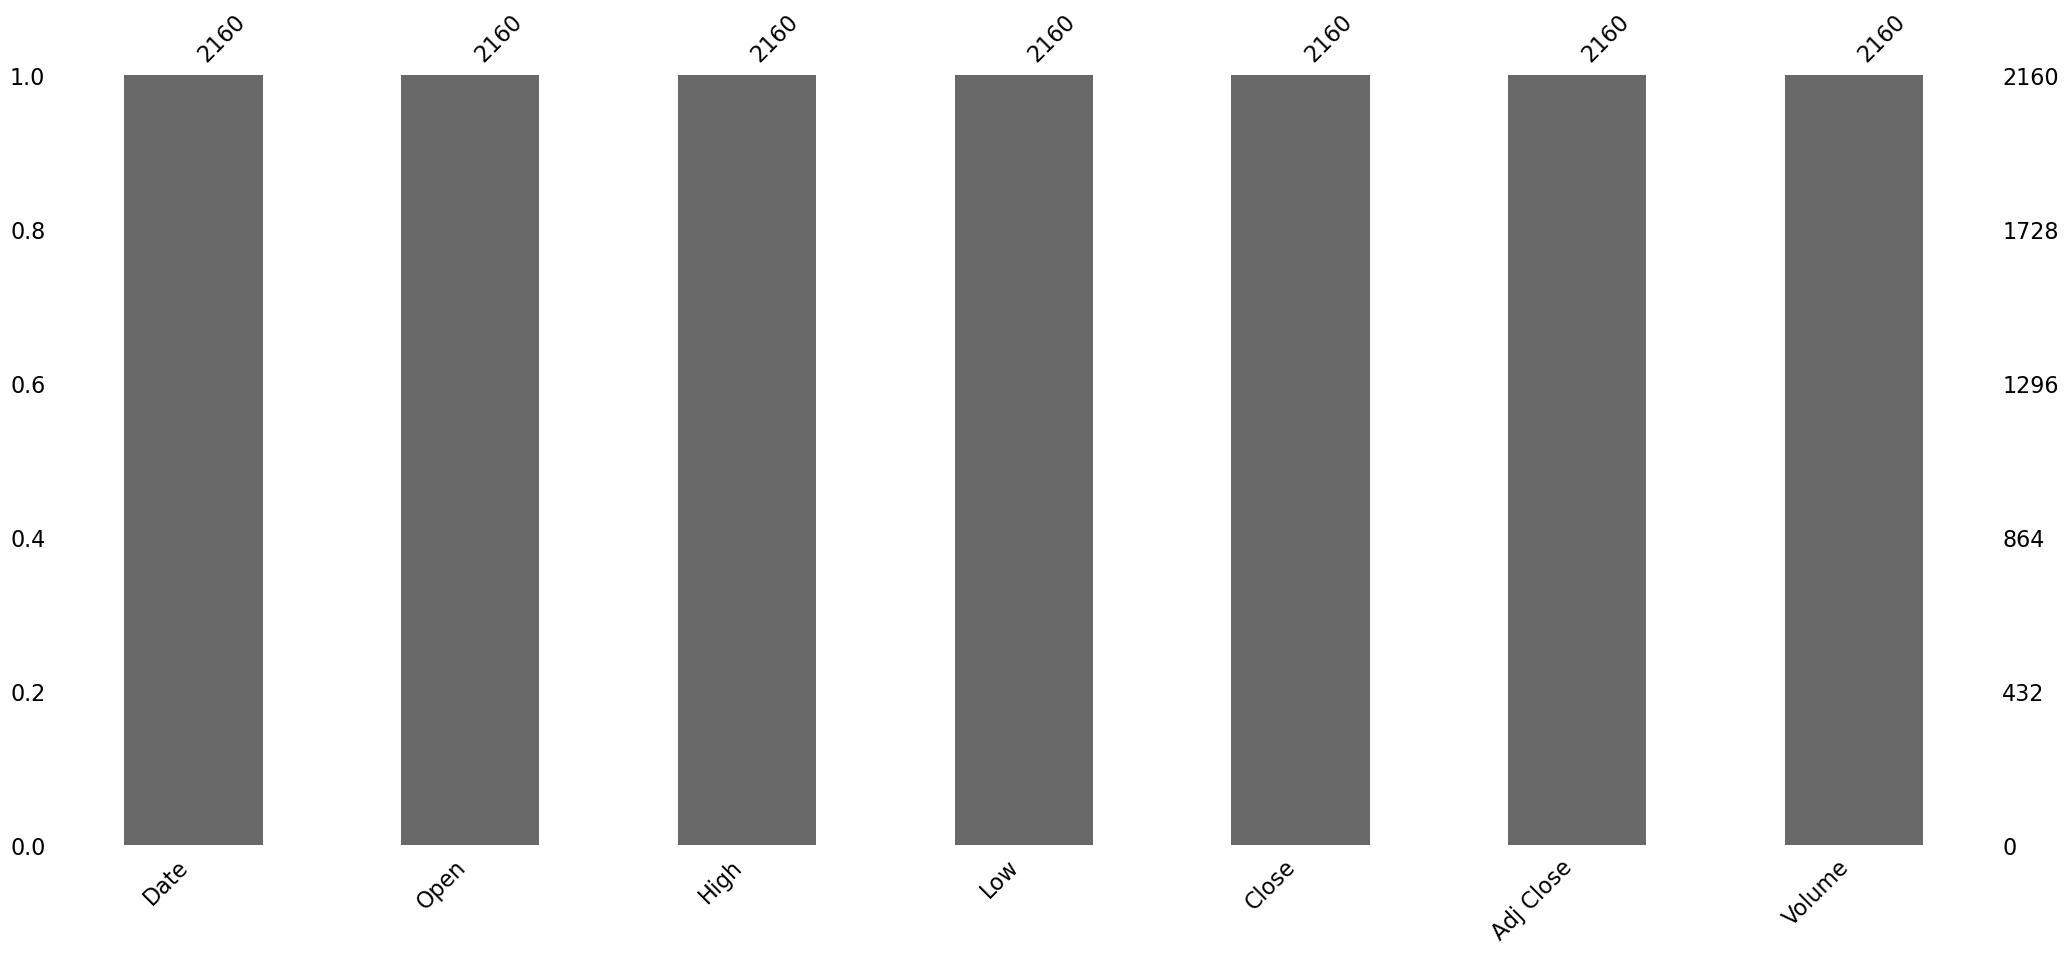

In [8]:
msno.bar(et_price_df)

**Quick overall visualization of Ethereum stock open and close price.**

In [9]:
fig = go.Figure(data=[go.Candlestick(
    x=et_price_df['Date'],
    open=et_price_df['Open'], high=et_price_df['High'],
    low=et_price_df['Low'], close=et_price_df['Close'],
    increasing_line_color= 'green', decreasing_line_color= 'red'
)])

fig.update_layout(
    title='Overall visualization of Data')

fig.show()

The graph shows that Ethereum reached its peak during 2021. 

Reasons coud be related with the following:

- Technological Developments: Ethereum witnessed significant technological advancements during this period. The 'Berlin update,' implemented in April 2021, and the subsequent Ethereum Merge in 2022, reduced transaction fees (ETH gas prices), enhancing network efficiency.

- Decentralized Finance (DeFi) and NFTs: The proliferation of DeFi and NFTs played a pivotal role. DeFi protocols attracted substantial capital, reflecting high demand. Notably, a digital artwork set a record by selling as the world's most expensive NFT, transacted in Ethereum.

- Institutional Investment: Ethereum's price received a boost from prominent institutional investors who announced plans to introduce crypto market products, reinforcing investor confidence.

- Market Sentiment: Positive news coverage and optimistic investor sentiment also contributed to Ethereum's price ascent.

Let's see it more in detail.

In [10]:
def plot_seasonal_decompose(result: seasonal_decompose, dates: pd.Series = None, title: str = "Seasonal Decomposition"):
    """
    Plot the seasonal decomposition results.

    Parameters:
        - result (seasonal_decompose): The result from seasonal decomposition.
        - dates (pd.Series, optional): The corresponding dates for the time series data.
        - title (str, optional): The title for the plot.
    """
    x_values = dates if dates is not None else np.arange(len(result.observed))
    
    fig = make_subplots(
        rows=4,
        cols=1,
        subplot_titles=["Observed Price", "Trend Price", "Seasonal Component", "Residuals"],
    )
    
    fig.add_trace(
        go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observed Price'),
        row=1,
        col=1,
    )
    
    fig.add_trace(
        go.Scatter(x=x_values, y=result.trend, mode="lines", name='Trend Price'),
        row=2,
        col=1,
    )
    
    fig.add_trace(
        go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Seasonal Component'),
        row=3,
        col=1,
    )
    
    fig.add_trace(
        go.Scatter(x=x_values, y=result.resid, mode="lines", name='Residuals'),
        row=4,
        col=1,
    )
    
    fig.update_layout(
        height=900, 
        title=f'<b>{title}</b>', 
        margin={'t': 100}, 
        title_x=0.5, 
        showlegend=False
    )
    
    fig.show()

data = et_price_df
decomposition = seasonal_decompose(data['Close'], model='additive', period=12)
plot_seasonal_decompose(decomposition, dates=data['Date'], title="Seasonal Decomposition of Close Price")

The graph produced provide a comprehensive view of the different components that contribute to the behavior of a time series and shows its underlying components:

- Observed Price: This is the original time series data, representing the actual closing prices over time. It includes all fluctuations and trends.

- Trend Price: This component represents the long-term trend or pattern in the data, which can help identify whether prices are generally increasing, decreasing, or remaining relatively stable over time.

- Seasonal Component: This component represents the repeating patterns or seasonal variations in the data. It captures fluctuations that occur at regular intervals, such as daily, weekly, or monthly patterns.

- Residuals: The residuals, also known as the irregular component, represent the remaining variation in the data that cannot be explained by the trend or seasonal components. These are essentially the random fluctuations or noise in the data.

We can si a weak upward trend, and it looks like our data are non-stationary. 

In analyzing the seasonal decomposition graph, it seems that there is a lack of any discernible or consistent pattern or trend in the price's evolution over the entire duration of the data. This suggests that the price fluctuations are not subject to a consistent seasonal pattern or a clear long-term trend.

**Analisys of Ethereum in comparison to Bitcoin, Oil, Gold, Vanguard Information Technology ETF and the Vanguard Energy Index Fund**

- Crude Oil (CL=F): This essential resource, known for its substantial price fluctuations, stands as the largest and is notably sensitive to geopolitical, social, and economic factors, both on the demand and supply fronts. It often reacts significantly to shifts in global events.

- Gold (GC=F): Often considered a valuable asset, especially in times of financial uncertainty, gold is frequently sought after as a safe haven. It serves as a store of value and is a preferred investment during economic turbulence and currency devaluation.

- Vanguard Information Technology ETF (VGT): Comprising companies from the electronics and computer industries, including leaders in cutting-edge technology, this ETF is noteworthy. It's worth mentioning that many cryptocurrencies are underpinned by blockchain technology, which heavily relies on advanced computer technology. Consequently, developments in the tech sector can exert influence on the cryptocurrency market.

- Vanguard Energy Index Fund (VDE): Representing the energy sector, this fund includes companies in the oil, gas, and coal businesses. Changes in energy prices and the performance of energy companies can carry significant implications for both the broader economy and investment portfolios.

- VIX (Volatility Index): The VIX, often referred to as the "Fear Gauge," measures market volatility and reflects investor sentiment. It is not directly related to the assets mentioned above but plays a crucial role in assessing overall market stability. Elevated VIX levels can indicate increased market uncertainty and risk aversion among investors, potentially affecting investment decisions across a wide range of assets. Understanding the VIX is essential for gauging market sentiment and making informed investment choices.

In [11]:
# Printing the start date and end date of the Ethereum dataset
# -----------------------------------------------------------
start=et_price_df.iloc[0][0]
end=et_price_df.iloc[-1][0]

available_days = (end - start).days + 1


print('Starting Date',start)
print('Ending Date',end)
print('Count of Days:', available_days)

Starting Date 2017-11-09 00:00:00
Ending Date 2023-10-08 00:00:00
Count of Days: 2160


It appears that data are available starting from November 09, 2017.

We create a DataFrame with daily 'Close' prices and calculate the percentage change of the daily prices using the pct_change() which is a method that calculates the percentage change between each day's closing price and the closing price of the previous day. This calculation yields a percentage that represents the daily return or price movement.

In [12]:
# Create a lis of tikers
# ---------------------------
tickers = ['BTC-USD', 'ETH-USD','GC=F', 'CL=F', 'VGT', 'VDE', '^VIX']

prices = pd.DataFrame()

for i in tickers:
    data = yf.download(i, start=start, end=end_date)
    price = data['Close']
    returns = price.pct_change(1)
    prices[i] = returns
    
prices.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


BTC-USD   ETH-USD      GC=F      CL=F       VGT      VDE  \
Date                                                                    
2017-11-09       NaN       NaN       NaN       NaN       NaN      NaN   
2017-11-10 -0.073554 -0.067411 -0.010268 -0.007521  0.000364 -0.00480   
2017-11-11 -0.039368  0.051555       NaN       NaN       NaN      NaN   
2017-11-12 -0.064101 -0.021523       NaN       NaN       NaN      NaN   
2017-11-13  0.102422  0.028606  0.003851  0.000352 -0.000182 -0.00755   

                ^VIX  
Date                  
2017-11-09       NaN  
2017-11-10  0.075238  
2017-11-11       NaN  
2017-11-12       NaN  
2017-11-13  0.018601

<Axes: >

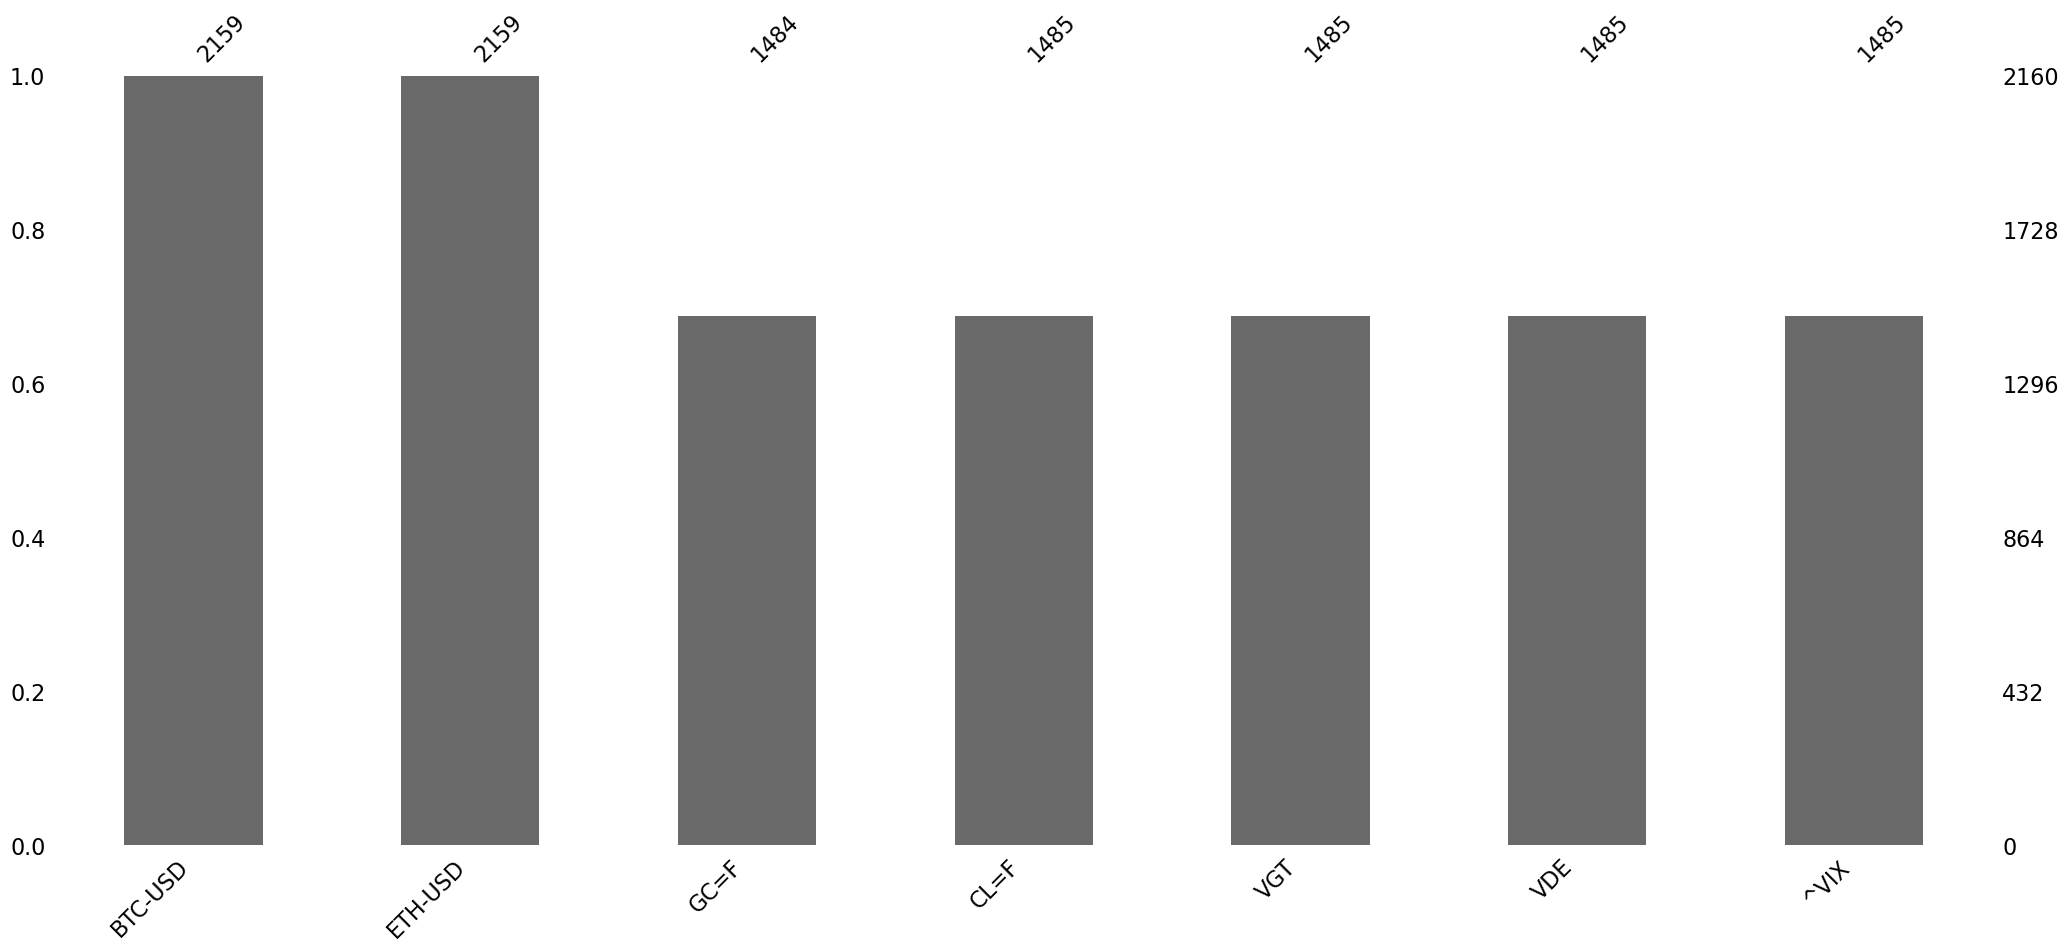

In [13]:
msno.bar(prices)

As we can see, in financial markets, not all assets are traded every day, as some markets operate only from Monday to Friday. In a typical year, there are approximately 255 trading days. When working with financial data, it's common to encounter missing values (NaN) for weekends and holidays when the market is closed.

To handle this, we fill in the NaN values in our DataFrame with the most recent available data from the preceding trading day. This practice is known as "forward-filling," and it ensures that the missing data points are replaced with the most recent observed values, maintaining continuity in our time series data.

In [14]:
prices_filled = prices.fillna(method='ffill')

# there are no previous trading days before '2017-11-09' to forward-fill from, so we drop the first row
prices_filled = prices_filled.dropna()

prices_filled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2159 entries, 2017-11-10 to 2023-10-08
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC-USD  2159 non-null   float64
 1   ETH-USD  2159 non-null   float64
 2   GC=F     2159 non-null   float64
 3   CL=F     2159 non-null   float64
 4   VGT      2159 non-null   float64
 5   VDE      2159 non-null   float64
 6   ^VIX     2159 non-null   float64
dtypes: float64(7)
memory usage: 134.9 KB


In [15]:
print(prices_filled.isnull().sum())
print("-"*20)
print(prices_filled.isna().sum())

BTC-USD    0
ETH-USD    0
GC=F       0
CL=F       0
VGT        0
VDE        0
^VIX       0
dtype: int64
--------------------
BTC-USD    0
ETH-USD    0
GC=F       0
CL=F       0
VGT        0
VDE        0
^VIX       0
dtype: int64


**Visualizing the data**

Since plotting daily returns could end in a dense plot, a better option is plotting daily returns for each month 

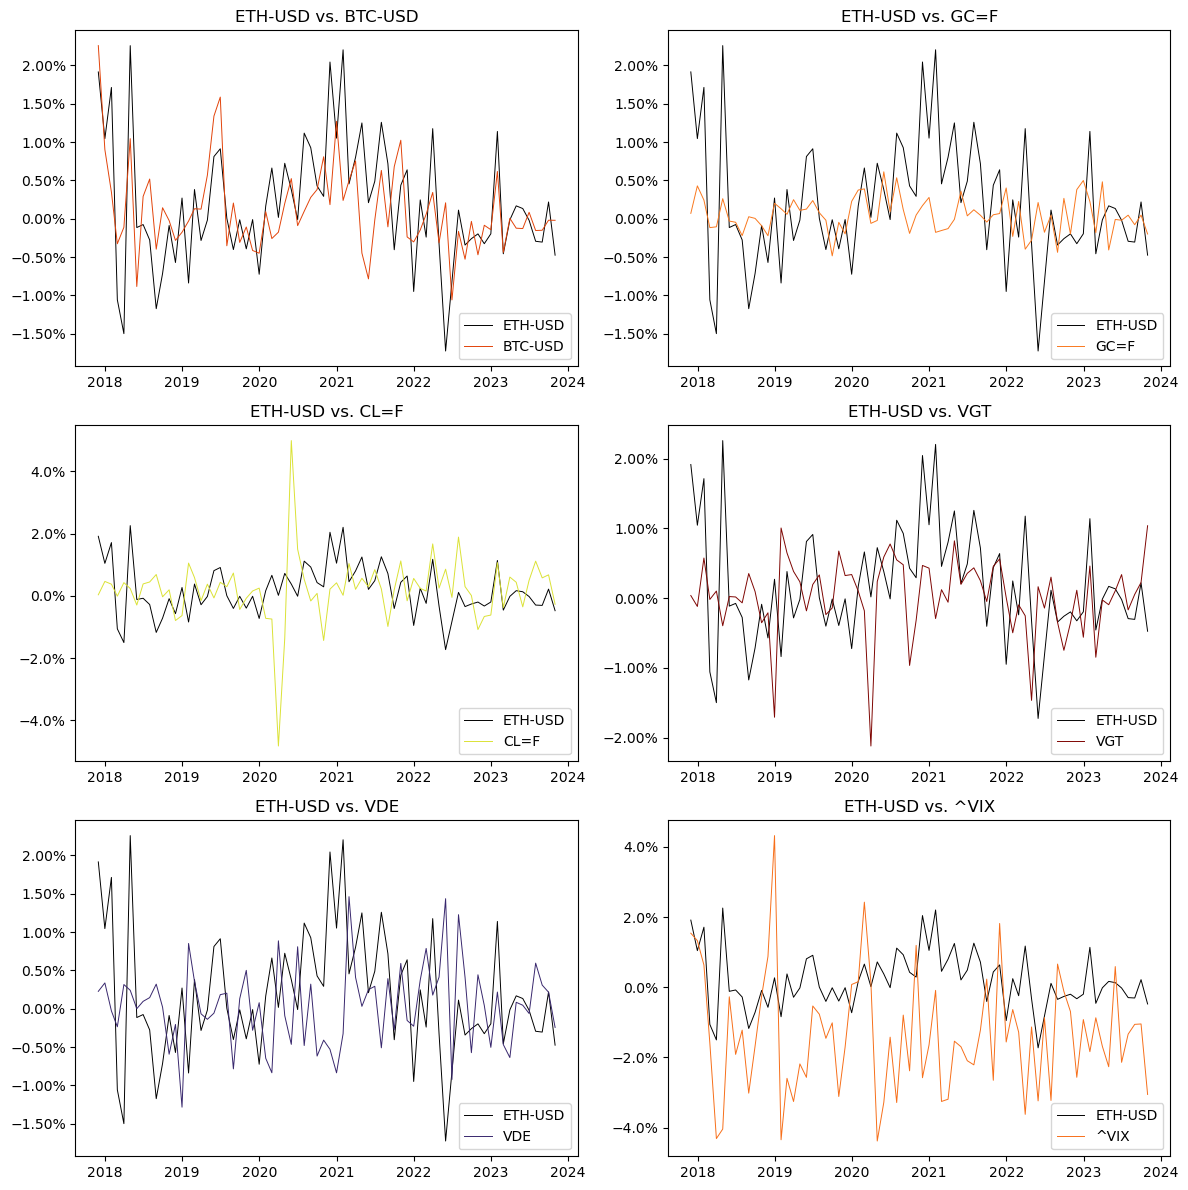

In [17]:
selected_variables = ['BTC-USD', 'GC=F', 'CL=F', 'VGT', 'VDE', '^VIX']

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Define a list of colors for the second variable in each graph
palette = [plt.cm.turbo(random.random()) for _ in range(len(selected_variables))]

# Plot Ethereum (ETH-USD) against each selected variable
for i, variable in enumerate(selected_variables):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Set the color for Ethereum (ETH-USD) and the selected variable
    eth_color = 'black'
    other_color = palette[i]
    
    # Plot ETH-USD against the current variable
    ax.plot(prices_month_med['ETH-USD'], label='ETH-USD', linewidth=0.7, color=eth_color)
    ax.plot(prices_month_med[variable], label=variable, linewidth=0.7, color=other_color)
    
    # Format the y-axis as a percentage
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
    
    # Add legends and titles
    ax.legend(loc='lower right')
    ax.set_title(f'ETH-USD vs. {variable}')

# Hide any remaining empty subplot if exists
if len(selected_variables) % 2 != 0:
    axs[-1, -1].axis('off')

plt.tight_layout()

plt.show()

The graphs illustrate a notable pattern of extreme volatility in oil prices throughout the year 2020, a period was marked by violent fluctuations in oil prices, coinciding with the onset of the Covid-19. The price shock was primarily driven by oversupply and a rapid drop in demand. Notably, the price of US oil futures even reached negative values, setting a historic record.
Additionally, it suggests a similar trend in the evolution of Bitcoin and Ethereum all along the period. Accordely to the graph, the VIX indicator doesn't seem to be directly related with changes in the value of Ethereum.

Asset return and volatility (risk) are crucial in portfolio construction. Investors aim for high returns with low risk. Daily returns provide rich data, but annualized returns are preferred for comparison (since we filled our df, will be calculated as mean returns multiplied by 365 days). Risk is measured by standard deviation, and it helps compute the Sharpe Ratio, a key indicator for risk-adjusted performance. Higher Sharpe ratios signal better risk-adjusted performance, making it a widely used metric despite its simplicity.

In [18]:
# Calculate average annualized returns
average_returns = prices_filled.mean() * 365 * 100
print('Average annualized returns (arithmetic mean) are:\n', average_returns)

# Calculate standard deviation
standard_deviation = prices_filled.std() * np.sqrt(365)
print('Standard Deviation is:\n', standard_deviation)

# Calculate Sharpe ratio
sharpe_ratio = average_returns / standard_deviation
print('Sharpe ratio:\n', sharpe_ratio)

Average annualized returns (arithmetic mean) are:
 BTC-USD    49.822025
ETH-USD    70.235111
GC=F       12.372950
CL=F      -24.242869
VGT        26.161098
VDE        21.595637
^VIX      -75.021184
dtype: float64
Standard Deviation is:
 BTC-USD    0.727960
ETH-USD    0.916942
GC=F       0.180882
CL=F       1.481510
VGT        0.319174
VDE        0.408662
^VIX       1.630761
dtype: float64
Sharpe ratio:
 BTC-USD    68.440617
ETH-USD    76.597147
GC=F       68.403425
CL=F      -16.363617
VGT        81.964942
VDE        52.844687
^VIX      -46.003800
dtype: float64


Ethereum has demonstrated a notably high average annualized return indicating strong performance. However, it's important to note that Ethereum also exhibits higher volatility compared to Bitcoin, which is reflected in its slightly lower Sharpe ratio. This suggests that Ethereum has delivered impressive returns, but investors have also had to accept a higher level of risk.

**Checking for Correlation**

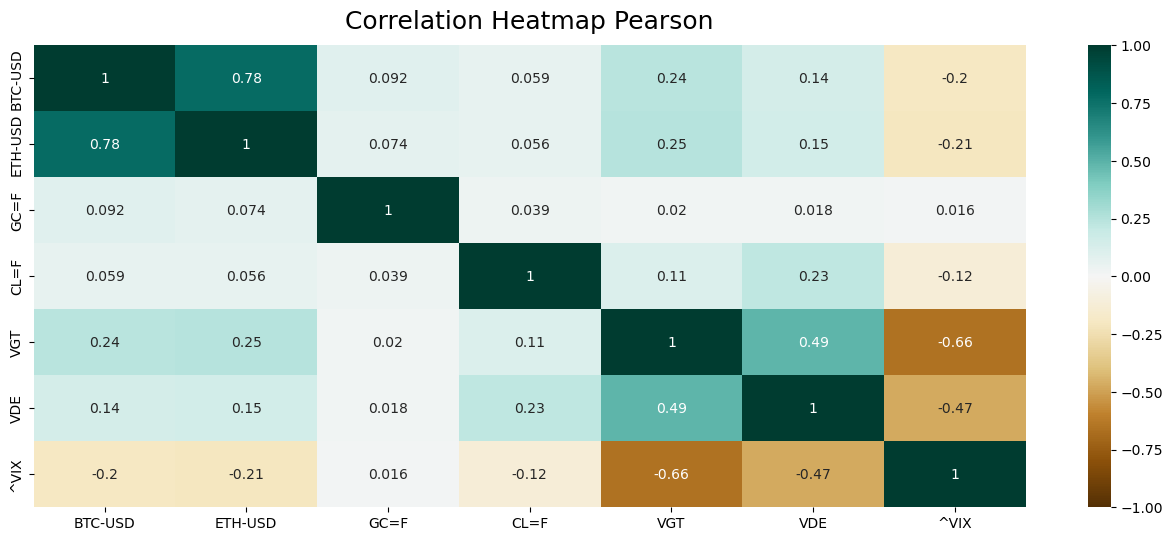

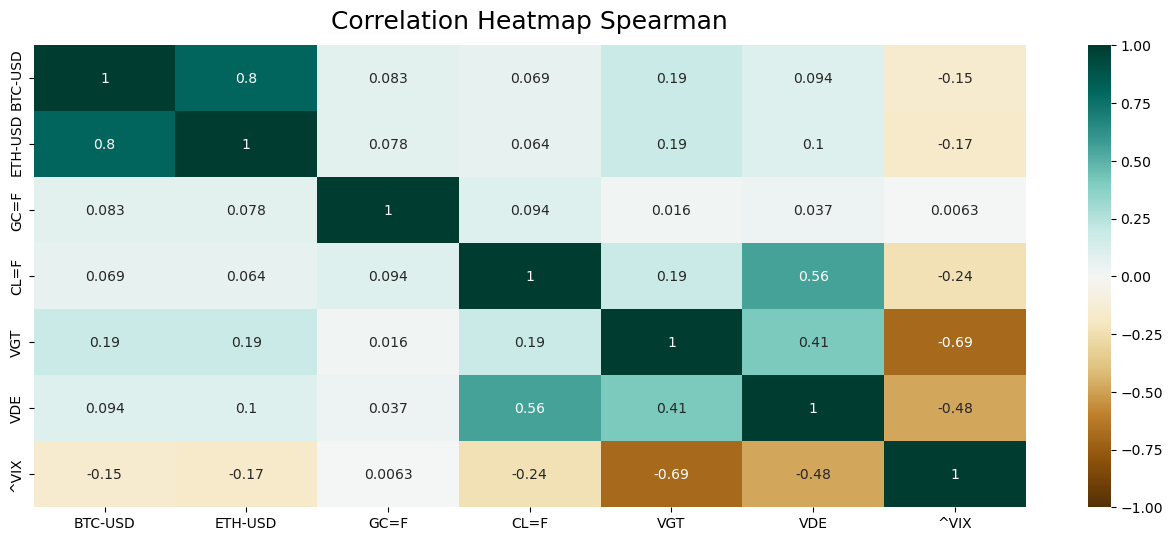

In [19]:
# Plotting the correlation between variables
# =======================================================================

# Pearson
plt.figure(figsize=(16, 6))
matrix = np.triu(prices_filled.corr())
heatmap = sns.heatmap(prices_filled.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap Pearson', fontdict={'fontsize':18}, pad=12);

# Spearman
plt.figure(figsize=(16, 6))
matrix = np.triu(prices_filled.corr())
heatmap = sns.heatmap(prices_filled.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap Spearman', fontdict={'fontsize':18}, pad=12);


plt.show()

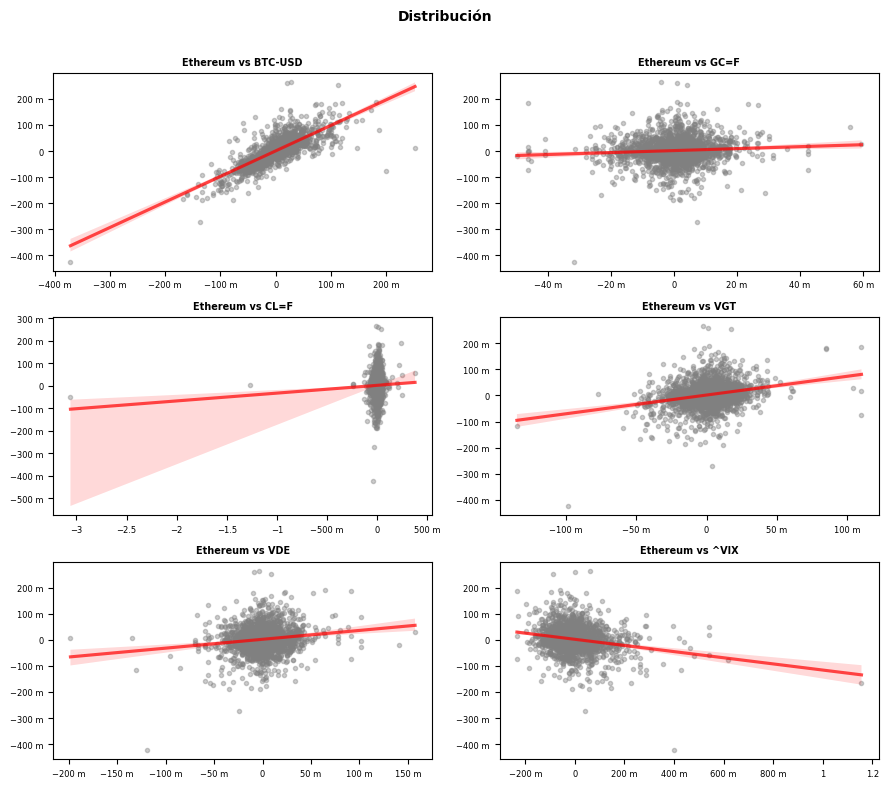

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))
axes = axes.flat

graph_df = prices_filled[['BTC-USD', 'GC=F', 'CL=F', 'VGT', 'VDE', '^VIX']]

for i, column in enumerate(graph_df.columns):
    sns.regplot(
        x           = graph_df[column],
        y           = prices_filled['ETH-USD'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Ethereum vs {column}", fontsize=7, fontweight="bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4, 4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Eliminar los ejes vacíos
#for i in [5]:
    #fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución', fontsize=10, fontweight="bold")

plt.show()

In [21]:
prices_filled.corr()['ETH-USD'].sort_values(ascending=False)

ETH-USD    1.000000
BTC-USD    0.775735
VGT        0.249960
VDE        0.151326
GC=F       0.074253
CL=F       0.056088
^VIX      -0.209582
Name: ETH-USD, dtype: float64

It's evident that Bitcoin and Ethereum exhibit a remarkably strong positive correlation, which aligns with expectations. These two leading cryptocurrencies share a robust and often linear relationship, with their prices often moving in tandem. This correlation can be attributed to the shared characteristics and technologies underpinning the broader cryptocurrency market.

However, when we examine Ethereum's correlation with other traditional assets, such as Crude Oil (CL=F), Gold (GC=F), Vanguard Information Technology ETF (VGT), Vanguard Energy Index Fund (VDE) and even the VIX (Volatility Index), we find that Ethereum appears to operate somewhat independently. The absence of a significant correlation suggests that Ethereum's price dynamics may not be as directly influenced by the factors affecting these traditional assets.

<div class="alert alert-block alert-info">
    <b>Prophet Model</b></div>

A short forecast forizon is typically less challenging than longer-term forecasts. Shorter time horizons allow the model to capture and respond to more immediate patterns and trends in the data.

So, given the high volatility of cryptocurrencies, the goal is to generate a 30-day price forecast, corresponding to a 30-day forecast horizon.

In [92]:
prophet_df = et_price_df[["Date", "Close"]]

prophet_df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)

In [93]:
prophet_df.head()

ds           y
0 2017-11-09  320.884003
1 2017-11-10  299.252991
2 2017-11-11  314.681000
3 2017-11-12  307.907990
4 2017-11-13  316.716003

Now we can visualize the new df

In [94]:
fig = go.Figure(go.Scatter(
    x = prophet_df['ds'],
    y = prophet_df['y']
))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ))

fig.update_layout(
    title='Ethereum Close price'
)

fig.show()

In [95]:
split_date = datetime.now() - timedelta(days=31)

# Split the data into train and test based on the split date
train_prophet_df = prophet_df[prophet_df['ds'] <= split_date]
test_prophet_df = prophet_df[prophet_df['ds'] > split_date]

In [96]:
print(train_prophet_df.shape)
print(test_prophet_df.shape)

(2130, 2)
(30, 2)


In [97]:
# Let's start with a first basic Model
# ----------------------------------
warnings.simplefilter("ignore")
basic_model = Prophet(
)

basic_model.fit(train_prophet_df)

18:29:17 - cmdstanpy - INFO - Chain [1] start processing
18:29:17 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
# Prophet make_future_dataframe function for predicting the future
# ---------------------------------------------------------------
future_df = basic_model.make_future_dataframe(periods=30)
future_df.head()

ds
0 2017-11-09
1 2017-11-10
2 2017-11-11
3 2017-11-12
4 2017-11-13

In [99]:
forecast_df = basic_model.predict(future_df)

In [100]:
forecast_df.head()

ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2017-11-09  820.128868  484.534489  1175.828850   820.128868   820.128868   
1 2017-11-10  818.702049  486.468416  1152.291844   818.702049   818.702049   
2 2017-11-11  817.275230  515.663678  1126.703311   817.275230   817.275230   
3 2017-11-12  815.848411  471.056471  1115.107302   815.848411   815.848411   
4 2017-11-13  814.421592  438.339937  1112.159070   814.421592   814.421592   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       17.137645             17.137645             17.137645 -2.325104   
1        2.681380              2.681380              2.681380 -4.952290   
2       -5.110732             -5.110732             -5.110732 -0.991013   
3      -14.416832            -14.416832            -14.416832  1.184489   
4      -26.454590            -26.454590            -26.454590  0.178062   

   weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0     -2.325104     -2.325104  19.462750     19.462750     19.462750   
1     -4.952290     -4.952290   7.633670      7.633670      7.633670   
2     -0.991013     -0.991013  -4.119719     -4.119719     -4.119719   
3      1.184489      1.184489 -15.601321    -15.601321    -15.601321   
4      0.178062      0.178062 -26.632652    -26.632652    -26.632652   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  837.266513  
1                         0.0  821.383429  
2                         0.0  812.164498  
3                         0.0  801.431579  
4                         0.0  787.967003

As we can see Prophet provides a detailed dataset output, but we typically focus on four essential columns for forecasting that provide a clear view of forecasted values, central estimates, and the range of possible outcomes.:

- ds (Datestamp): This column shows the timestamp or date for each forecasted value, indicating when the prediction applies.

- yhat (Forecasted Value): Representing the predicted value of the metric, 'yhat' is the central estimate of what the value is expected to be at a specific time.

- yhat_lower (Lower Bound): This column defines the lower limit of forecasted values, establishing a range within which the actual value is likely to fall with confidence. It represents the minimum expected value.

- yhat_upper (Upper Bound): Similar to 'yhat_lower,' this column sets the upper limit of forecasted values, indicating the maximum expected value within a specified confidence range.

In [101]:
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower   yhat_upper
0 2017-11-09  837.266513  484.534489  1175.828850
1 2017-11-10  821.383429  486.468416  1152.291844
2 2017-11-11  812.164498  515.663678  1126.703311
3 2017-11-12  801.431579  471.056471  1115.107302
4 2017-11-13  787.967003  438.339937  1112.159070

In [102]:
# Plotting the result of our forecast
# --------------------------------------
plot_plotly(basic_model, forecast_df)

In [103]:
# plotting seasonality and trend components of the forecast
# --------------------------------------------------------
plot_components_plotly(basic_model, forecast_df)

As depicted in the graph, there appears to be a subtle upward trend expected for the upcoming year. Furthermore, it is noteworthy that prices typically experience an increase on Wednesdays and during the month of May. This observation suggests a potential correlation between these specific time periods and price fluctuations.

We are going to evaluate our forecasting model using two common metrics: MAPE (Mean Absolute Percentage Error) and RMSE (Root Mean Squared Error).

In [104]:
predictions = forecast_df.iloc[-len(test_prophet_df):]['yhat']
actuals = test_prophet_df['y']
#Calculate RMSE
print(f"RMSE: {round(rmse(actuals, predictions))}")

# Calculate the APE (Absolute Percentage Error) for each data point
ape = abs((actuals - predictions) / actuals) * 100

# Calculate MAPE (Mean Absolute Percentage Error)
mape = ape.mean()

# Print the MAPE
print(f"MAPE: {mape}")

RMSE: 116
MAPE: 5.990214878768063


- RMSE: The RMSE indicates that, on average, the model's predictions are quite good. For a 30-day forecast, this level of error is quite low and suggests that your model is providing accurate predictions.

- MAPE: This MAPE omeans that, on average, your model's predictions have an quite low error relative to the actual values. Again, this indicates good predictive performance.

Let's explore the possibility of improving model performance through cross-validation and hyperparameter tuning. The following code automates the process of optimizing a Prophet forecasting model's hyperparameters, training the model, making future predictions, and evaluating the model's accuracy on a cryptocurrency price dataset. The goal is to find the best set of hyperparameters that results in accurate and reliable predictions for a 30-day period into the future. We used Cross-validation of Prophet, that can be used with the entire dataset because of how cross-validation works in this context. Instead of splitting the data into training and test sets, Prophet uses a different approach. This allows Prophet to evaluate how well the model performs at predicting future data based on the information it had available at each cut point. That's why we can use the entire dataset while still maintaining a robust form of model validation.

In [116]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.50, 1, 10],
    'seasonality_prior_scale': [0.01, 0.1, 1, 10],
    'holidays_prior_scale': [0.01, 0.1, 1, 10],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range':[0.8, 0.95]
}

# Define the number of iterations for the random search
n_iter = 10

# Perform random search
results = []
for params in ParameterSampler(param_grid, n_iter=n_iter):
    model = Prophet(**params)
    try:
        model.fit(prophet_df)
        
        # Perform cross-validation
        cv_results = cross_validation(model, initial='900 days', period='30 days', horizon='30 days', parallel="processes")
        df_p = performance_metrics(cv_results)

        metrics = {}
        try:
            metrics['mape'] = df_p['mape'].mean()
        except KeyError:
            pass

        try:
            metrics['mae'] = df_p['mae'].mean()
        except KeyError:
            pass

        try:
            metrics['rmse'] = df_p['rmse'].mean()
        except KeyError:
            pass

        results.append({
            'params': params,
            'metrics': metrics,
        })
    except Exception as e:
        print("Error occurred:", e)
        continue

# Find the best parameters
best_params = min(results, key=lambda x: (x['metrics'].get('mape', float('inf')), 
                                           x['metrics'].get('mae', float('inf')), 
                                           x['metrics'].get('rmse', float('inf'))))['params']

# Print the best parameters
print('Best Parameters:')
print(best_params)

# Use the best parameters to predict future values
model = Prophet(**best_params)
model.fit(train_prophet_df)

# Prepare future data for one year ahead prediction
future_data = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future_data)

# Print predicted Ethereum prices
print("Predicted Ethereum Prices:")
print(forecast[['ds', 'yhat']])

new_predictions = forecast.iloc[-len(test_prophet_df):]['yhat']
#Calculate RMSE
print(f"RMSE: {round(rmse(actuals, new_predictions))}")

# Calculate the APE (Absolute Percentage Error) for each data point
new_ape = abs((actuals - new_predictions) / actuals) * 100

# Calculate MAPE (Mean Absolute Percentage Error)
new_mape = new_ape.mean()
print(f"MAPE: {new_mape}")

19:03:54 - cmdstanpy - INFO - Chain [1] start processing
19:03:54 - cmdstanpy - INFO - Chain [1] done processing
19:04:20 - cmdstanpy - INFO - Chain [1] start processing
19:04:22 - cmdstanpy - INFO - Chain [1] done processing
19:05:50 - cmdstanpy - INFO - Chain [1] start processing
19:05:52 - cmdstanpy - INFO - Chain [1] done processing
19:07:07 - cmdstanpy - INFO - Chain [1] start processing
19:07:08 - cmdstanpy - INFO - Chain [1] done processing
19:08:31 - cmdstanpy - INFO - Chain [1] start processing
19:08:31 - cmdstanpy - INFO - Chain [1] done processing
19:09:16 - cmdstanpy - INFO - Chain [1] start processing
19:09:17 - cmdstanpy - INFO - Chain [1] done processing
19:10:27 - cmdstanpy - INFO - Chain [1] start processing
19:10:28 - cmdstanpy - INFO - Chain [1] done processing
19:11:33 - cmdstanpy - INFO - Chain [1] start processing
19:11:34 - cmdstanpy - INFO - Chain [1] done processing
19:12:22 - cmdstanpy - INFO - Chain [1] start processing
19:12:22 - cmdstanpy - INFO - Chain [1]

Best Parameters:
{'seasonality_prior_scale': 10, 'seasonality_mode': 'additive', 'holidays_prior_scale': 0.01, 'changepoint_range': 0.95, 'changepoint_prior_scale': 10}


19:13:48 - cmdstanpy - INFO - Chain [1] start processing
19:13:50 - cmdstanpy - INFO - Chain [1] done processing


Predicted Ethereum Prices:
             ds         yhat
0    2017-11-09   212.474729
1    2017-11-10   219.989219
2    2017-11-11   234.124951
3    2017-11-12   247.051830
4    2017-11-13   257.112602
...         ...          ...
2155 2023-10-04  1517.462437
2156 2023-10-05  1512.188948
2157 2023-10-06  1510.675839
2158 2023-10-07  1516.997047
2159 2023-10-08  1523.199087

[2160 rows x 2 columns]
RMSE: 97
MAPE: 4.6862880443562425


In [117]:
# Plotting the result of our forecast
# --------------------------------------
plot_plotly(model, forecast)

An RMSE of 97 and a MAPE of approximately 4.69% after hyperparameter tuning for a 30-day forecast are excellent results. These metrics indicate that the model improved and, after tuning, is providing accurate and precise predictions. 

A few key points to consider:

Accuracy Improvement: The reduction in both RMSE and MAPE compared to the previous results (RMSE: 116 and MAPE: 5.99%) demonstrates the positive impact of hyperparameter tuning.

Consistency: The consistency between RMSE and MAPE suggests that your model is consistently accurate across the dataset.

Overall, achieving an RMSE of 97 and a MAPE of approximately 4.69% for a 30-day forecast is indicative of a well-tuned and accurate forecasting model and it's a positive outcome.

<div class="alert alert-block alert-info">
    <b>ARIMA Model</b></div>

In [118]:
# First, we create a df for arima to work with
# --------------------------------------------
arima_df = et_price_df[['Date', 'Close']]

arima_df = arima_df.set_index(['Date'])

arima_df

Close
Date                   
2017-11-09   320.884003
2017-11-10   299.252991
2017-11-11   314.681000
2017-11-12   307.907990
2017-11-13   316.716003
...                 ...
2023-10-04  1647.838135
2023-10-05  1611.476440
2023-10-06  1645.831543
2023-10-07  1634.511230
2023-10-08  1633.548584

[2160 rows x 1 columns]

Dividing data in train and test

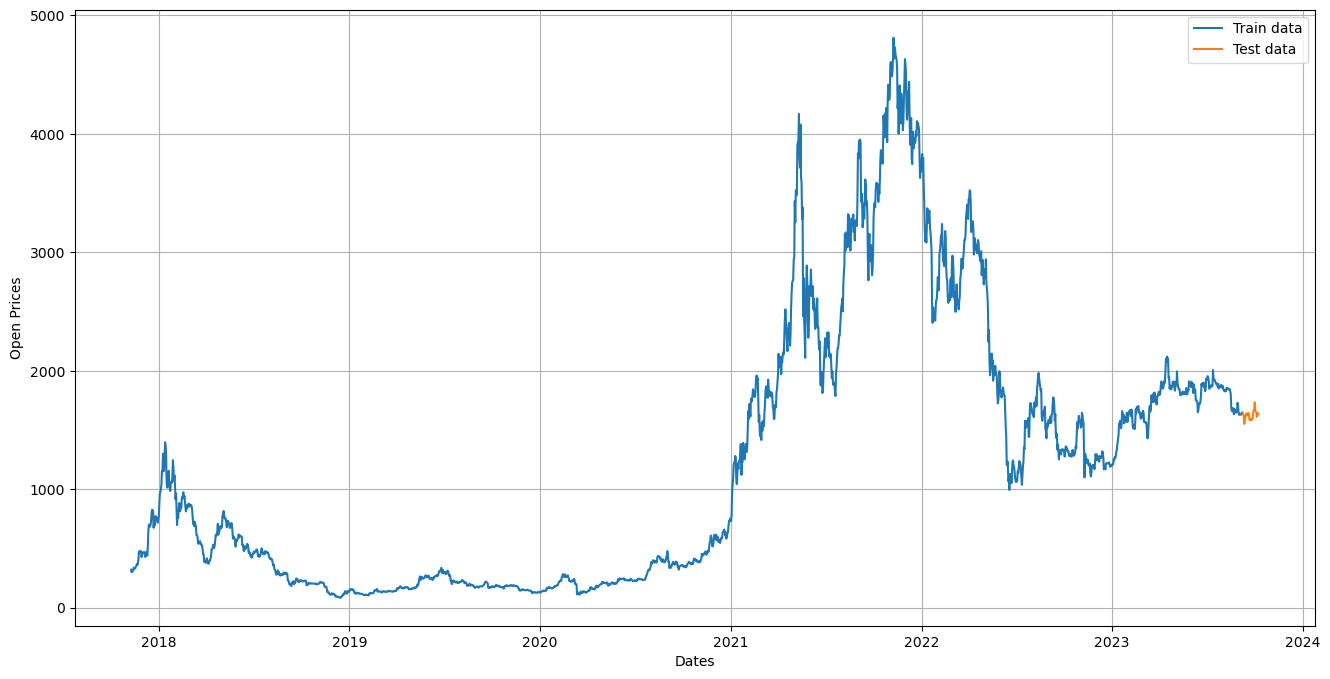

In [137]:
# Calculate the index to split the data
split_index = len(arima_df) - 31

# Split the data into training and test sets
train_data, test_data = arima_df.iloc[:split_index], arima_df.iloc[split_index:]

# Create a plot to visualize the split
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(train_data['Close'], label='Train data')
plt.plot(test_data['Close'], label='Test data')
plt.legend()
plt.show()

**Check for Stationarity**

The first step in using ARIMA is to verify whether our data exhibit stationary characteristics.
For the ARIMA model to work effectively, it requires time series data with a stationary pattern. In the context of time series analysis, stationary data refers to a type of time series where statistical properties, such as mean, variance, and autocorrelation, remain constant over time.

- The Augmented Dickey-Fuller test is used to assess whether a time series data has a unit root, a common characteristic of non-stationary time series. The null hypothesis (H0) in this test assumes that the time series has a unit root and is non-stationary, while the alternative hypothesis (HA) suggests that the series is stationary.

- The KPSS test examines whether a time series is stationary around a mean or a linear trend. In this test, the null hypothesis assumes that the series is stationary. Therefore, small p-values (e.g., less than 0.05) reject the null hypothesis and suggest that differencing is needed.

Stationarity for the Original Series
ADF Statistic: -1.4950449683250049, p-value: 0.5359610826288749
KPSS Statistic: 3.8353241138629803, p-value: 0.01

Stationarity for the First Order Differenced Series
ADF Statistic: -11.594362293330766, p-value: 2.7431689455246097e-21
KPSS Statistic: 0.07979847923336325, p-value: 0.1

Stationarity for the Second Order Differenced Series
ADF Statistic: -17.261685125863735, p-value: 5.935873996598548e-30
KPSS Statistic: 0.01805415873826867, p-value: 0.1


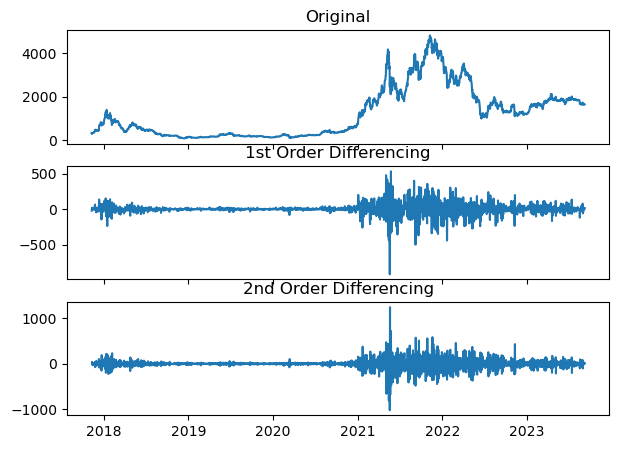

In [138]:
#warnings.filterwarnings("ignore")

# Calculate the first order difference of the 'arima_df' DataFrame and remove NaN values
first_order_difference = train_data.diff().dropna()

# Calculate the second order difference of the first order difference and remove NaN values
second_order_difference = first_order_difference.diff().dropna()

# Perform stationarity tests on the original series
print('Stationarity for the Original Series')
adf_result_original = adfuller(arima_df)
kpss_result_original = kpss(arima_df)
print(f'ADF Statistic: {adf_result_original[0]}, p-value: {adf_result_original[1]}')
print(f'KPSS Statistic: {kpss_result_original[0]}, p-value: {kpss_result_original[1]}')

# Perform stationarity tests on the first order differenced series
print('\nStationarity for the First Order Differenced Series')
adf_result_first_order = adfuller(first_order_difference)
kpss_result_first_order = kpss(first_order_difference)
print(f'ADF Statistic: {adf_result_first_order[0]}, p-value: {adf_result_first_order[1]}')
print(f'KPSS Statistic: {kpss_result_first_order[0]}, p-value: {kpss_result_first_order[1]}')

# Perform stationarity tests on the second order differenced series
print('\nStationarity for the Second Order Differenced Series')
adf_result_second_order = adfuller(second_order_difference)
kpss_result_second_order = kpss(second_order_difference)
print(f'ADF Statistic: {adf_result_second_order[0]}, p-value: {adf_result_second_order[1]}')
print(f'KPSS Statistic: {kpss_result_second_order[0]}, p-value: {kpss_result_second_order[1]}')

#warnings.filterwarnings("default")


fig, axes = plt.subplots(3, 1, figsize=(7, 5), sharex=True)
axes[0].plot(train_data); axes[0].set_title('Original')
# 1st Differencing
axes[1].plot(first_order_difference); axes[1].set_title('1st Order Differencing')
# 2nd Differencing
axes[2].plot(second_order_difference); axes[2].set_title('2nd Order Differencing')

plt.show()

In [139]:
first_order_difference

Close
Date                 
2017-11-10 -21.631012
2017-11-11  15.428009
2017-11-12  -6.773010
2017-11-13   8.808014
2017-11-14  20.915009
...               ...
2023-09-03  -0.907715
2023-09-04  -6.462402
2023-09-05   3.974121
2023-09-06  -1.377075
2023-09-07  15.345947

[2128 rows x 1 columns]

In [140]:
second_order_difference

Close
Date                 
2017-11-11  37.059021
2017-11-12 -22.201019
2017-11-13  15.581024
2017-11-14  12.106995
2017-11-15 -25.189026
...               ...
2023-09-03  -9.441895
2023-09-04  -5.554688
2023-09-05  10.436523
2023-09-06  -5.351196
2023-09-07  16.723022

[2127 rows x 1 columns]

Summary of the stationarity tests for the original, first-order differenced, and second-order differenced time series:

Original Series:

ADF Statistic: -1.4950449683250049
ADF p-value: 0.5359610826288749 (greater than 0.05)
KPSS Statistic: 3.8353241138629803
KPSS p-value: 0.01 (less than 0.05)
The p-value from the ADF test is greater than 0.05, indicating non-stationarity. The p-value from the KPSS test is less than 0.05, suggesting stationarity around a level (trend).

First Order Differenced Series:

ADF Statistic: -11.594362293330766
ADF p-value: 2.7431689455246097e-21 (much less than 0.05)
KPSS Statistic: 0.07979847923336325
KPSS p-value: 0.1 (greater than 0.05)
The p-value from the ADF test is much less than 0.05, indicating stationarity. The p-value from the KPSS test is greater than 0.05, suggesting stationarity around a mean.

Second Order Differenced Series:

ADF Statistic: -17.261685125863735
ADF p-value: 5.935873996598548e-30 (much less than 0.05)
KPSS Statistic: 0.01805415873826867
KPSS p-value: 0.1 (greater than 0.05)
The p-value from the ADF test is much less than 0.05, indicating stationarity. The p-value from the KPSS test is greater than 0.05, suggesting stationarity around a mean.

Based on the p-values, stationarity is achieved in the first-order differenced series and second-order differenced series since their ADF test p-values are much less than 0.05. The original series and first-order differenced series are not stationary according to the ADF test.

Setting the differencing order 'd' to a value greater than 2 in ARIMA models is generally not recommended in most cases. Differencing is used to make the time series data stationary, which means removing trends and seasonality to make it more suitable for modeling. However, excessively differencing the data can lead to over-differencing, resulting in a series that is too stationary and lacks meaningful information.

Finally, we are going to use 2 as a paramether for the 'd' value.

In [141]:
#warnings.filterwarnings("ignore")

# Concatenate the dataframes
combined_df = pd.concat([train_data, second_order_difference])

# Add the 'source' column to the combined DataFrame
combined_df['source'] = ['Original'] * len(train_data) + ['First Order Difference'] * len(second_order_difference)

# Create a histogram using Plotly Express
fig = px.histogram(combined_df, x="Close", color="source")

# Customize the layout
fig.update_layout(
    bargap=0.2  # Adjust the gap between bars
)

# Show the plot
fig.show()


The plot histogram emphasizes that first_order_difference fluctuates around its mean.

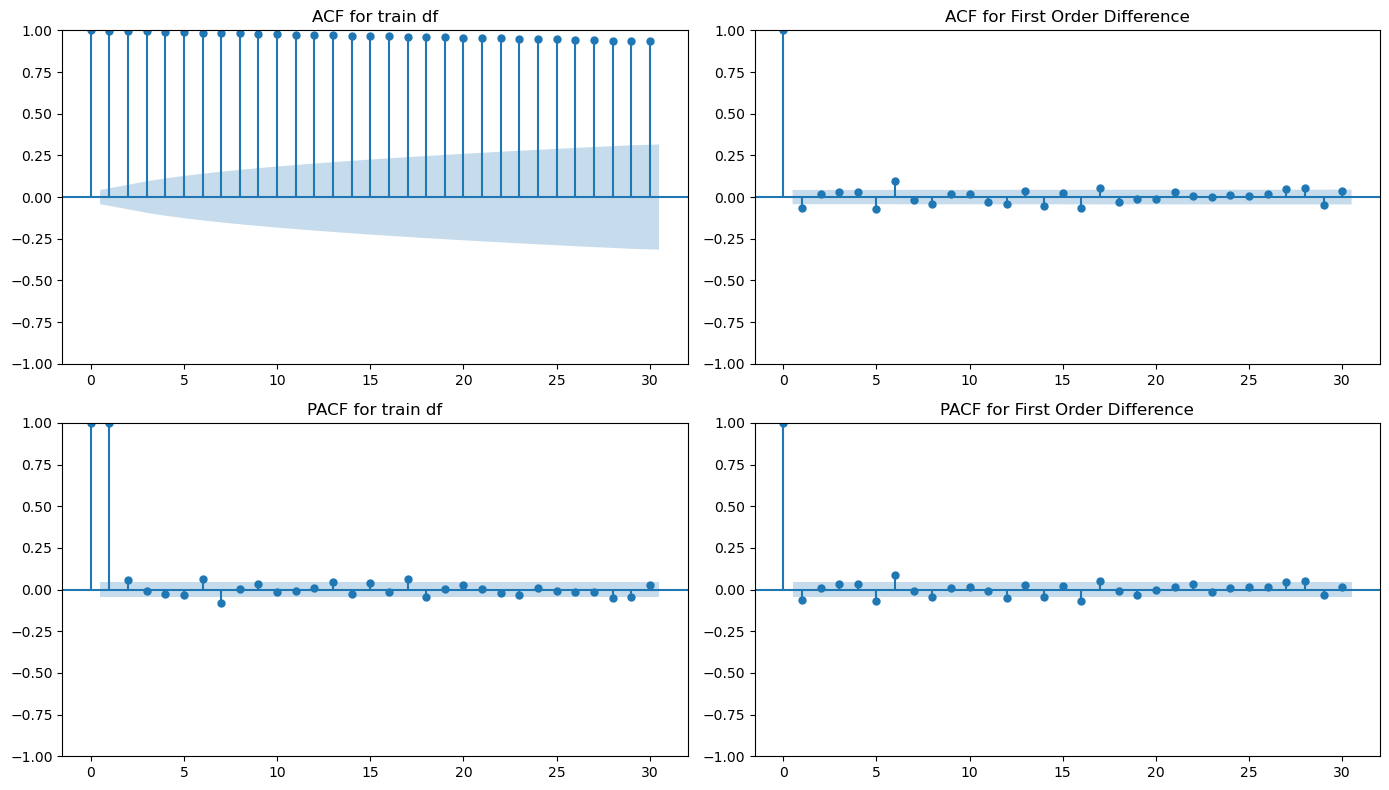

In [142]:
# Create subplots outside the loop
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Plot ACF and PACF for 'original_df'
sm.graphics.tsa.plot_acf(train_data, lags=30, ax=axs[0, 0])
axs[0, 0].set_title('ACF for train df')
sm.graphics.tsa.plot_pacf(train_data, lags=30, ax=axs[1, 0])
axs[1, 0].set_title('PACF for train df')

# Plot ACF and PACF for 'second_order_difference'
sm.graphics.tsa.plot_acf(first_order_difference, lags=30, ax=axs[0, 1])
axs[0, 1].set_title('ACF for First Order Difference')
sm.graphics.tsa.plot_pacf(first_order_difference, lags=30, ax=axs[1, 1])
axs[1, 1].set_title('PACF for First Order Difference')

# Add space between subplots and show the figure
fig.tight_layout()
plt.show()

Based on the patterns in the ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots, it appears that the initial values for q and p for your ARMA (AutoRegressive Moving Average) model could be as follows:

q (order of the moving average part): 6 
p (order of the auto-regressive part): 6

In [146]:
train_arima = train_data['Close']
test_arima = test_data['Close']

history = [x for x in train_arima]
y = test_arima

# Fit the ARIMA model
arima_model1 = ARIMA(history, order=(6, 2, 6))
arima_model1_fit = arima_model1.fit()
print(arima_model1_fit.summary())

# Rolling forecasts
predictions = arima_model1_fit.forecast(steps=len(y))

#Get metrics
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
rmse = math.sqrt(mse)

print("-"*30)
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2129
Model:                 ARIMA(6, 2, 6)   Log Likelihood              -12191.192
Date:                Mon, 09 Oct 2023   AIC                          24408.384
Time:                        20:30:12   BIC                          24481.996
Sample:                             0   HQIC                         24435.328
                               - 2129                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.7665      0.078    -35.453      0.000      -2.919      -2.614
ar.L2         -3.8519      0.165    -23.322      0.000      -4.176      -3.528
ar.L3         -3.8027      0.184    -20.692      0.0

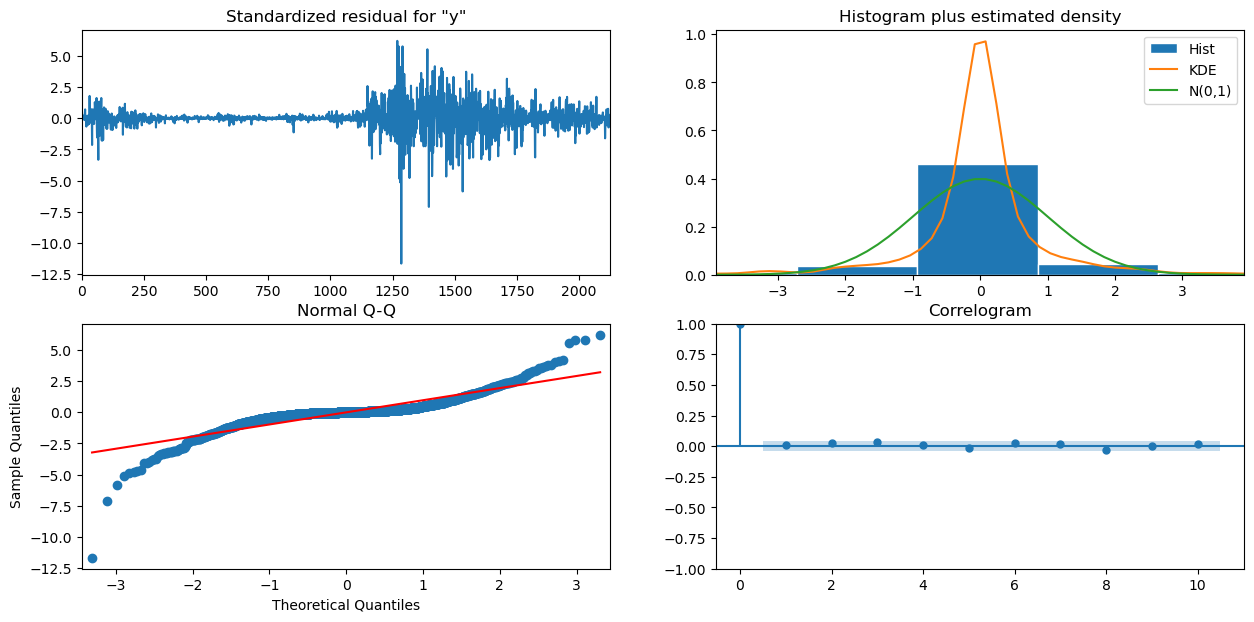

In [147]:
arima_model1_fit.plot_diagnostics()
plt.show()

Based on the model summary and the error metrics provided, here are some observations:

- Model Summary: The ARIMA(6, 2, 6) model seems to have significant AR and MA terms at lags 1, 2, 3, 4, and 6 as their p-values are less than 0.05. This suggests that these lags are statistically significant.

- Residuals: The Ljung-Box test (Q) has a p-value of 0.76 which is greater than 0.05, suggesting that the residuals are independently distributed. The Jarque-Bera test indicates that the residuals are not normally distributed given the p-value is less than 0.05.

- Error Metrics: The Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) are relatively low compared to your previous model. These metrics measure the average squared difference, absolute difference, and square root of the squared differences respectively between the predicted and actual values. Lower values for these metrics generally indicate a better fit of the model.

In conclusion, while the ARIMA(6, 2, 6) model captures some patterns in the data (as indicated by significant AR and MA terms), it might not be the best fit for the data given the relatively high error metrics and non-normal distribution of residuals.
You might want to experiment with different model orders or consider other time series models or transformations to further improve the model fit.

In summary, while the ARIMA(6, 2, 6) model captures some patterns in the data (as indicated by significant AR and MA terms), it might not be the best fit for the data given the relatively high error metrics and non-normal distribution of residuals and it may not be the most suitable model for forecasting this specific time series. However, we are going to try to improve our model using auto_arima.

The auto_arima function is used to identify the best parameters for ARIMA models.

In [151]:
#Standard ARIMA Model
auto_arima_model = pm.auto_arima(train_arima, 
                      start_p=0, 
                      start_q=0,
                      #test='adf', # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=True, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24453.824, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24446.868, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24447.147, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24451.969, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24448.571, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24448.710, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24448.972, Time=0.83 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=24445.032, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=24446.732, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=24446.871, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=24445.311, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=24447.117, Time=0.40 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.266 seconds


In [155]:
# Fit the ARIMA model
arima_model2 = ARIMA(train_arima, order=(1, 1, 0))
arima_model2_fit = arima_model2.fit()
print(arima_model2_fit.summary())

new_predictions = arima_model2_fit.forecast(steps=len(y))

new_mse = mean_squared_error(y, new_predictions)
new_mae = mean_absolute_error(y, new_predictions)
new_rmse = math.sqrt(mse)

print("-"*30)
print('MSE:', new_mse)
print('MAE:', new_mae)
print('RMSE:', new_rmse)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2129
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -12220.516
Date:                Mon, 09 Oct 2023   AIC                          24445.032
Time:                        20:40:17   BIC                          24456.358
Sample:                    11-09-2017   HQIC                         24449.178
                         - 09-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0647      0.011     -5.781      0.000      -0.087      -0.043
sigma2      5698.7392     56.037    101.695      0.000    5588.908    5808.571
Ljung-Box (L1) (Q):                   0.00   Jarque-

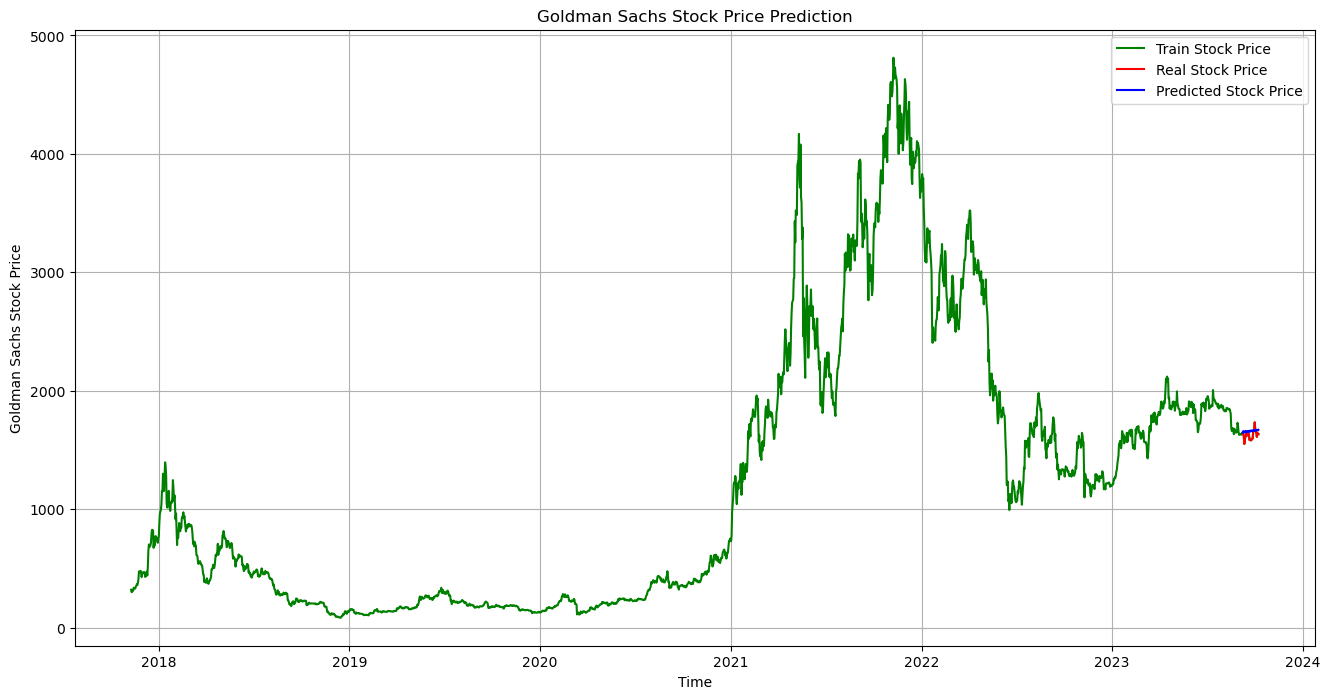

In [156]:
plt.figure(figsize=(16,8))
plt.plot(arima_df.index, arima_df['Close'], color='green', label='Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Goldman Sachs Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Goldman Sachs Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

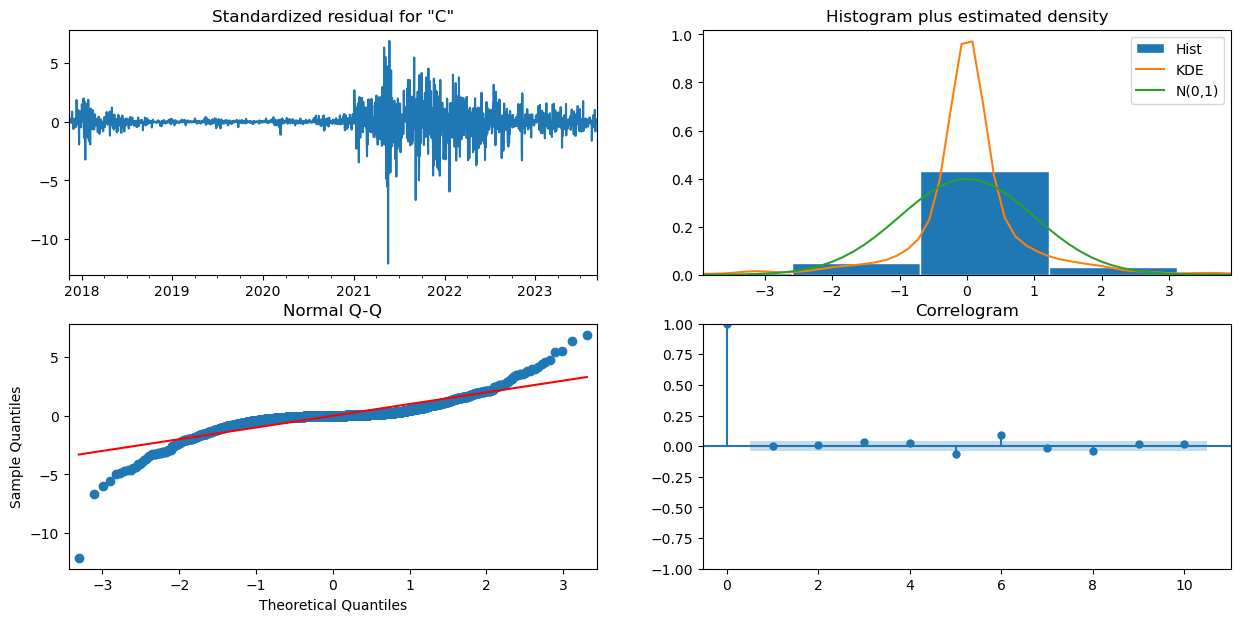

In [157]:
arima_model2_fit.plot_diagnostics()
plt.show()

Overall Conclusion from the plot above:

- Residuals: The residuals not fluctuating around a mean of zero and not having a uniform variance could indicate that the model has not fully captured the information in the data. This could be due to missing predictors, interactions, or non-linearity in the data.

- Histogram Density: The fact that the density plot suggests a normal distribution with mean zero is a good sign. This is one of the assumptions of many statistical models, including ARIMA.

- QQ Plot: The QQ plot showing that the residuals are light-tailed (i.e., less extreme values than expected under normality) could indicate that the residuals are not perfectly normally distributed. However, this does not necessarily mean that your model is bad. Many models work well even if this assumption is violated.

- Correlogram (ACF plot): The ACF plot doesn't seem to show autocorrelation in the residuals.

In conclusion,despite the fact that the ARIMA(1, 1, 0) model seems to be a better fit for your data compared to the previous models as indicated by lower error metrics, it appears that the performance of the ARIMA model did not improve significantly after using auto_arima. The metrics values before and after auto_arima are very similar, with only minor changes. However, the residuals are still not normally distributed which might suggest some information is not captured by the model.

While ARIMA is a powerful and flexible model, it might not be able to fully capture the complexities of cryptocurrency price data, which can be influenced by a wide range of factors. Other modeling techniques or more complex time series models, might yield better results.

However, let's trey another focus.

We are going to use logarithmic data transformation, that especially when dealing with financial time series data like cryptocurrency prices, can be beneficial for several reasons:

- Stabilizing Variance: Logarithmic transformation can help stabilize the variance in the data. Financial data often exhibits heteroscedasticity, where the variance of the data changes over time. Taking the logarithm can mitigate this issue.

- Linearizing Trends: Logarithmic transformation can make trends in the data more linear. Linear relationships are easier to model with linear or quasi-linear methods like ARIMA.

- Normalization: Logarithmic transformation can help normalize the data. This can be particularly useful when you have extreme values or outliers in the original data that can skew statistical analyses.

- Interpretable Percentage Changes: When you log-transform data, the differences in log values represent percentage changes. This can be more interpretable and relevant in financial contexts.

In [180]:
arima_log = arima_df['Close']

arima_df_log = dragon.log(arima_log)

The following code takes the natural logarithm of the arima_log variable or DataFrame and stores the result in a new variable called arima_df_log. This transformation is often used in time series analysis to stabilize variance, linearize relationships, and make the data more suitable for modeling. It can be particularly helpful when dealing with data that exhibits exponential growth or increasing variance over time. 

In [167]:
#Standard ARIMA Model
auto_arima_model2 = pm.auto_arima(arima_df_log, 
                      start_p=0, 
                      start_q=0,
                      #test='adf', # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=True, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6921.390, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6923.477, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6923.054, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6922.872, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6928.264, Time=0.73 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6927.092, Time=1.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6929.129, Time=1.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6926.708, Time=1.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6925.152, Time=1.75 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6924.716, Time=1.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6927.508, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-6926.579, Time=2.84 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-6929.638, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6928.159, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0

Printing Predicted vs Expected Values...


predicted = 1637.458177,   expected = 1635.162354,   error = 0.140403  %
predicted = 1634.557627,   expected = 1616.828857,   error = 1.096515  %
predicted = 1617.502738,   expected = 1551.637695,   error = 4.244873  %
predicted = 1553.195948,   expected = 1592.429443,   error = 2.463751  %
predicted = 1587.089261,   expected = 1607.988525,   error = 1.299715  %
predicted = 1609.711859,   expected = 1626.974365,   error = 1.061019  %
predicted = 1627.101991,   expected = 1641.640381,   error = 0.885601  %
predicted = 1642.137523,   expected = 1635.221680,   error = 0.422930  %
predicted = 1636.304529,   expected = 1622.896729,   error = 0.826165  %
predicted = 1623.029226,   expected = 1637.347046,   error = 0.874452  %
predicted = 1636.070036,   expected = 1643.544678,   error = 0.454788  %
predicted = 1644.116903,   expected = 1622.890625,   error = 1.307930  %
predicted = 1624.056318,   expected = 1584.307007,   error = 2.508940  %
predicte

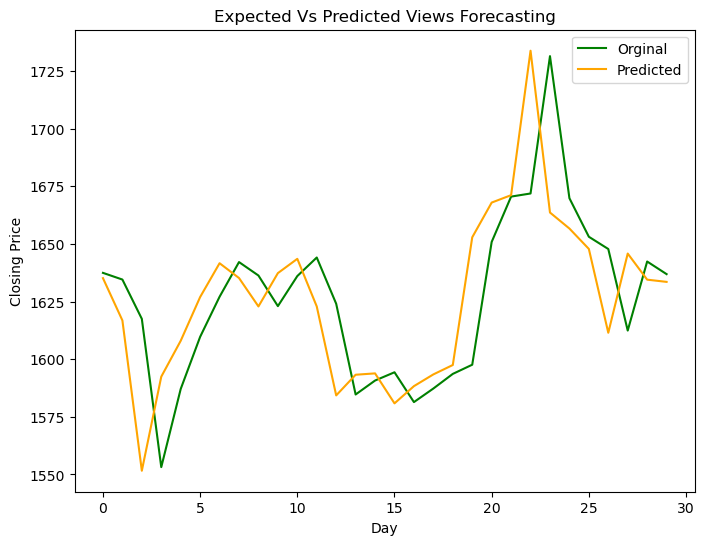

In [188]:
size = int(len(arima_df_log)-30)

# Divide into train and test
train_arima, test_arima = arima_df_log[0:size], arima_df_log[size:len(arima_df_log)]


new_history = [x for x in train_arima]
new_predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(new_history, order=(2, 1, 0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    new_history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    new_predictions.append(float(pred_value))
    originals.append(float(original_value))

    
print("-"*30)    
# Calculate MAPE
mape = sum(error_list) / len(error_list)

# Calculate MAE
mae = mean_absolute_error(originals, new_predictions)

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(originals, new_predictions))

print('MAPE:', mape)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

plot.figure(figsize=(8, 6))
test_day = [t for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, new_predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

It seems that using using logarithmic data in ARIMA Model has improved incredibly the performance of the model itself.

- MAPE: 1.28%: The Mean Absolute Percentage Error (MAPE) of approximately 1.28% indicates that, on average, the model's predictions deviate by about 1.28% from the actual values.

- MAE: 20.84: The Mean Absolute Error (MAE) of approximately 20.84 represents the average absolute difference between the model's predictions and the actual values. It's a measure of the model's accuracy.

- MSE: 2207.16: The Mean Squared Error (MSE) of approximately 2207.16 measures the average of the squared differences between the model's predictions and the actual values. A lower MSE indicates better accuracy.

- RMSE: 28.59: The Root Mean Squared Error (RMSE) of approximately 28.59 is the square root of the MSE and provides a similar interpretation. It quantifies the typical prediction error in the original scale.

Overall, these results suggest that the ARIMA model, when applied to logarithmic data, performs reasonably well in predicting, with relatively low errors and a small percentage of error on average.

**In conclusion:** 
With this project, we explored two different time series forecasting models, Prophet and ARIMA, to predict cryptocurrency prices. Both models have their strengths and weaknesses, and their performance was evaluated on a 30-day prediction task using a test dataset.

Prophet, a forecasting tool developed by Facebook, proved to be a relatively user-friendly and robust model for predicting cryptocurrency prices. It yielded an RMSE (Root Mean Squared Error) of 97 and a MAPE (Mean Absolute Percentage Error) of approximately 4.69%. These results indicate that Prophet performed reasonably well in capturing the underlying patterns and trends in the cryptocurrency price data. One notable advantage of Prophet is its simplicity and ease of use, making it accessible to users with varying levels of expertise.

On the other hand, the ARIMA model, when applied to logarithmic-transformed cryptocurrency price data, achieved a MAPE of approximately 1.28%, MAE of 20.84, MSE of 2207.16, and RMSE of 28.59. However, it's essential to note that ARIMA is a much more complex and challenging model to configure correctly, and it may not handle the specific characteristics of cryptocurrency price data as effectively as Prophet. The selection of model orders and parameters requires careful consideration, which can be less user-friendly, especially for those new to time series analysis.

Additionally, cryptocurrency price data presents unique challenges, including high volatility and non-linear behavior. Despite the accuracy achieved by any model, it's crucial to understand that predicting cryptocurrency prices remains a highly challenging task. Cryptocurrencies are influenced by a multitude of factors, including market sentiment, external events, regulatory changes, and global economic conditions, which can result in sudden and unpredictable price movements.

Therefore, even with the most advanced forecasting models, it's important to approach cryptocurrency price predictions with caution. The inherent volatility and susceptibility to external factors make precise predictions difficult. While models like ARIMA can provide valuable insights, they should be used as tools for analysis and not as guarantees of future price movements. Cryptocurrency markets are inherently speculative and can exhibit irrational behavior, further emphasizing the need for careful consideration and risk management when trading or investing in cryptocurrencies.